# **Taller Final: Clasificación en la Industria Azucarera**


## Clasificación (BD_IPSA_1940.xlsx): Clasificar dos variables clave:

Toneladas de caña por hectárea (TCH): Indicador de la productividad de la tierra.
Porcentaje de sacarosa (%Sac.Caña): Medida de la calidad de la caña y la cantidad de azúcar extraíble.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

### Cargar el dataset

In [44]:
df = pd.read_excel('BD_IPSA_1940.xlsx')

### Análisis exploratorio (EDA) del dataset

In [45]:
df.shape

(2187, 21)

In [46]:
df.head(3)

,Unnamed: 0,NOME,FAZ,TAL,tipocorte,variedad,madurada,producto,dosismad,semsmad,...,cortes,me,vejez,sacarosa,mes,periodo,TCH,lluvias,grupo_tenencia,pct_diatrea
0,11,AMAIME SILCA,81291,40,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.8,8.3,...,4,12.7,2.4,14.0,12,202012,112,137,3,6.2
1,12,AMAIME SILCA,81291,41,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.8,6.3,...,2,7.8,2.3,13.0,3,201903,157,0,3,3.5
2,13,AMAIME SILCA,81291,41,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.6,7.9,...,3,8.8,1.8,13.3,3,202003,167,68,3,4.3


In [47]:
print(df.columns)

Index(['Unnamed: 0', 'NOME', 'FAZ', 'TAL', 'tipocorte', 'variedad', 'madurada',
       'producto', 'dosismad', 'semsmad', 'edad', 'cortes', 'me', 'vejez',
       'sacarosa', 'mes', 'periodo', 'TCH', 'lluvias', 'grupo_tenencia',
       'pct_diatrea'],
      dtype='object')


In [48]:
#Distribución de las variables
variables = ['Unnamed: 0', 'NOME', 'FAZ', 'TAL', 'tipocorte', 'variedad', 'madurada',
       'producto', 'dosismad', 'semsmad', 'edad', 'cortes', 'me', 'vejez',
       'sacarosa', 'mes', 'periodo', 'TCH', 'lluvias', 'grupo_tenencia',
       'pct_diatrea']

for var in variables:
    print(f"---Conteo de categorias para '{var}'---")
    print(df[var].value_counts())
    print("\n")


---Conteo de categorias para 'Unnamed: 0'---
Unnamed: 0
11      1
2886    1
2872    1
2873    1
2874    1
       ..
1370    1
1369    1
1368    1
1367    1
4222    1
Name: count, Length: 2187, dtype: int64


---Conteo de categorias para 'NOME'---
NOME
SAN MIGUEL CARVAJAL    101
SANTA ANA               65
MARSELLA                48
EL ALBION               41
VILLA INES              36
                      ... 
EL LIBANO 3              1
EL LIBANO 2              1
MALIBU                   1
LA ITALIA EMPRESA        1
LA MARIA GIRALDO         1
Name: count, Length: 285, dtype: int64


---Conteo de categorias para 'FAZ'---
FAZ
80426    101
80396     65
80114     48
80402     41
80285     36
        ... 
82518      1
80197      1
80164      1
80131      1
80935      1
Name: count, Length: 285, dtype: int64


---Conteo de categorias para 'TAL'---
TAL
1       258
2       191
3       154
4       149
5       108
       ... 
002Z      1
280       1
081E      1
082A      1
545A      1
Name: coun

In [49]:
df.describe()

,Unnamed: 0,FAZ,dosismad,semsmad,edad,cortes,me,vejez,sacarosa,mes,periodo,TCH,lluvias,grupo_tenencia,pct_diatrea
count,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000
mean,2126.506630,80588.332876,0.993278,9.164838,12.766118,2.794239,9.197759,4.172154,12.777732,6.758573,201887.691358,142.393233,118.051212,2.435299,4.317284
std,1228.561661,572.818299,0.309096,3.441579,1.117866,1.621195,1.574409,6.339255,0.854397,3.482444,131.982686,25.838029,144.424675,0.704058,2.591956
min,11.000000,80100.000000,0.000000,-1.600000,10.300000,1.000000,3.400000,0.200000,9.200000,1.000000,201407.000000,6.000000,0.000000,1.000000,0.200000
25%,1038.000000,80222.000000,0.800000,7.100000,12.000000,1.000000,8.200000,2.100000,12.200000,4.000000,201807.000000,126.000000,0.000000,2.000000,2.900000
50%,2219.000000,80396.000000,1.000000,8.700000,12.500000,2.000000,9.100000,2.600000,12.800000,7.000000,201908.000000,144.000000,77.000000,3.000000,3.700000
75%,3223.500000,80660.000000,1.200000,10.600000,13.300000,4.000000,10.100000,3.300000,13.300000,10.000000,202005.000000,159.000000,171.500000,3.000000,5.000000
max,4222.000000,82519.000000,9.000000,45.000000,21.100000,14.000000,15.000000,102.900000,16.000000,12.000000,202101.000000,249.000000,1468.000000,3.000000,25.500000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2187 entries, 0 to 2186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2187 non-null   int64  
 1   NOME            2187 non-null   object 
 2   FAZ             2187 non-null   int64  
 3   TAL             2187 non-null   object 
 4   tipocorte       2187 non-null   object 
 5   variedad        2187 non-null   object 
 6   madurada        2187 non-null   object 
 7   producto        2187 non-null   object 
 8   dosismad        2187 non-null   float64
 9   semsmad         2187 non-null   float64
 10  edad            2187 non-null   float64
 11  cortes          2187 non-null   int64  
 12  me              2187 non-null   float64
 13  vejez           2187 non-null   float64
 14  sacarosa        2187 non-null   float64
 15  mes             2187 non-null   int64  
 16  periodo         2187 non-null   int64  
 17  TCH             2187 non-null   i

In [51]:
#Revisión de nulos en las variables
df.isnull().sum()

Unnamed: 0        0
NOME              0
FAZ               0
TAL               0
tipocorte         0
variedad          0
madurada          0
producto          0
dosismad          0
semsmad           0
edad              0
cortes            0
me                0
vejez             0
sacarosa          0
mes               0
periodo           0
TCH               0
lluvias           0
grupo_tenencia    0
pct_diatrea       0
dtype: int64

##### Al realizar la validación de valores nulos en el dataset no se encontró ninguno, por consiguiente no fue necesario hacer imputación

In [52]:
df.duplicated().sum()

0

In [53]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers =df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

columnas_numericas =df.select_dtypes(include=np.number).columns.tolist()

for columna in columnas_numericas:
    serie = df[columna]
    total_valores = serie.count()
    outliers = find_outliers_IQR(serie)
    cantidad_outliers = len(outliers)

    print(f"--- Columna: {columna} ---")
    print(f"Total de valores (no nulos): {total_valores}")
    print(f"Número de outliers: {cantidad_outliers}")
    print(f"Proporción de outliers: {cantidad_outliers / total_valores:.2%}")

    if cantidad_outliers > 0:
        print(f"Valor mínimo outlier: {outliers.min()}")
        print(f"Valor máximo outlier: {outliers.max()}")

--- Columna: Unnamed: 0 ---
Total de valores (no nulos): 2187
Número de outliers: 0
Proporción de outliers: 0.00%
--- Columna: FAZ ---
Total de valores (no nulos): 2187
Número de outliers: 250
Proporción de outliers: 11.43%
Valor mínimo outlier: 81353
Valor máximo outlier: 82519
--- Columna: dosismad ---
Total de valores (no nulos): 2187
Número de outliers: 11
Proporción de outliers: 0.50%
Valor mínimo outlier: 0.0
Valor máximo outlier: 9.0
--- Columna: semsmad ---
Total de valores (no nulos): 2187
Número de outliers: 92
Proporción de outliers: 4.21%
Valor mínimo outlier: -1.6
Valor máximo outlier: 45.0
--- Columna: edad ---
Total de valores (no nulos): 2187
Número de outliers: 70
Proporción de outliers: 3.20%
Valor mínimo outlier: 15.3
Valor máximo outlier: 21.1
--- Columna: cortes ---
Total de valores (no nulos): 2187
Número de outliers: 8
Proporción de outliers: 0.37%
Valor mínimo outlier: 9
Valor máximo outlier: 14
--- Columna: me ---
Total de valores (no nulos): 2187
Número de out

##### Los outliers en las variables no son significativos. Cabe mencionar que para la vejez, la lluvia y la pct_diatrea estos valores son caracteristicos de la naturaleza de la variable y se deben dejar en el dataset

In [54]:
df.TCH.describe()

count    2187.000000
mean      142.393233
std        25.838029
min         6.000000
25%       126.000000
50%       144.000000
75%       159.000000
max       249.000000
Name: TCH, dtype: float64

In [55]:
df.sacarosa.describe()

count    2187.000000
mean       12.777732
std         0.854397
min         9.200000
25%        12.200000
50%        12.800000
75%        13.300000
max        16.000000
Name: sacarosa, dtype: float64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2187 entries, 0 to 2186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2187 non-null   int64  
 1   NOME            2187 non-null   object 
 2   FAZ             2187 non-null   int64  
 3   TAL             2187 non-null   object 
 4   tipocorte       2187 non-null   object 
 5   variedad        2187 non-null   object 
 6   madurada        2187 non-null   object 
 7   producto        2187 non-null   object 
 8   dosismad        2187 non-null   float64
 9   semsmad         2187 non-null   float64
 10  edad            2187 non-null   float64
 11  cortes          2187 non-null   int64  
 12  me              2187 non-null   float64
 13  vejez           2187 non-null   float64
 14  sacarosa        2187 non-null   float64
 15  mes             2187 non-null   int64  
 16  periodo         2187 non-null   int64  
 17  TCH             2187 non-null   i

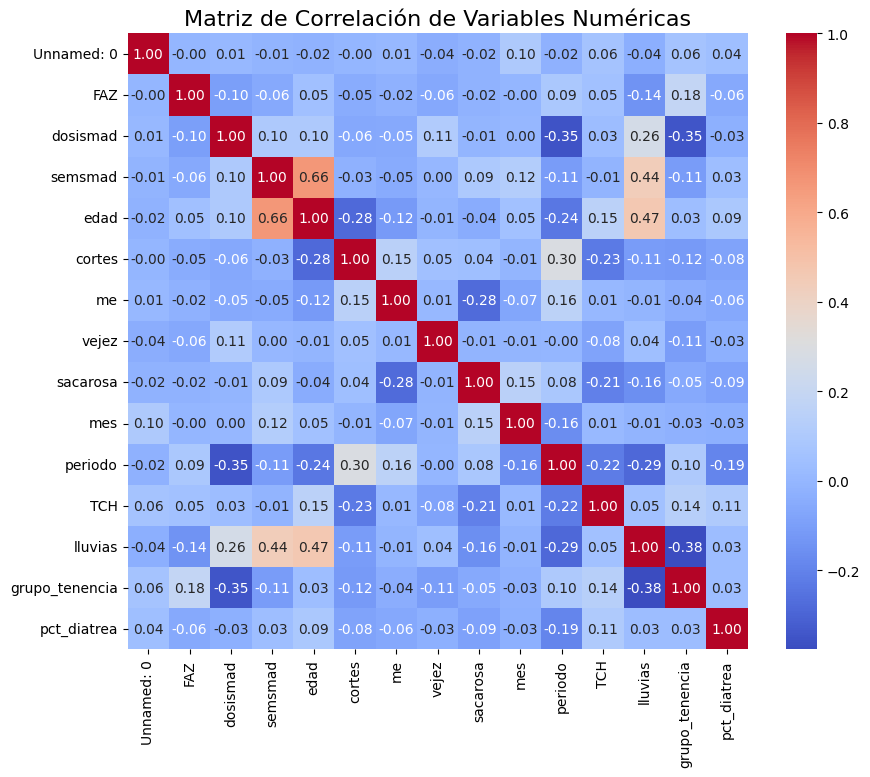

In [57]:
# Crear una copia del DataFrame
df_correlacion = df.copy()

# Matriz de correlación para las variables numéricas
plt.figure(figsize=(10, 8))
# Convertimos 'Revenue' y 'Weekend' a números (0/1) para incluirlos en la correlación
df_correlacion = df.copy()

# Excluimos las columnas de texto para el cálculo
numeric_cols = df_correlacion.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df_correlacion[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16)
plt.show()

#### En la matriz de correlación se observa correlaciones bajas con las variables objetivo:
* **TCH:** una correlación positiva con la edad y la pct_diatrea, y una correlación negativa con los cortes
* **sacarosa:** una correlación positiva con el mes, y una correlación negativa con la me y las lluvias

In [58]:
del df_correlacion

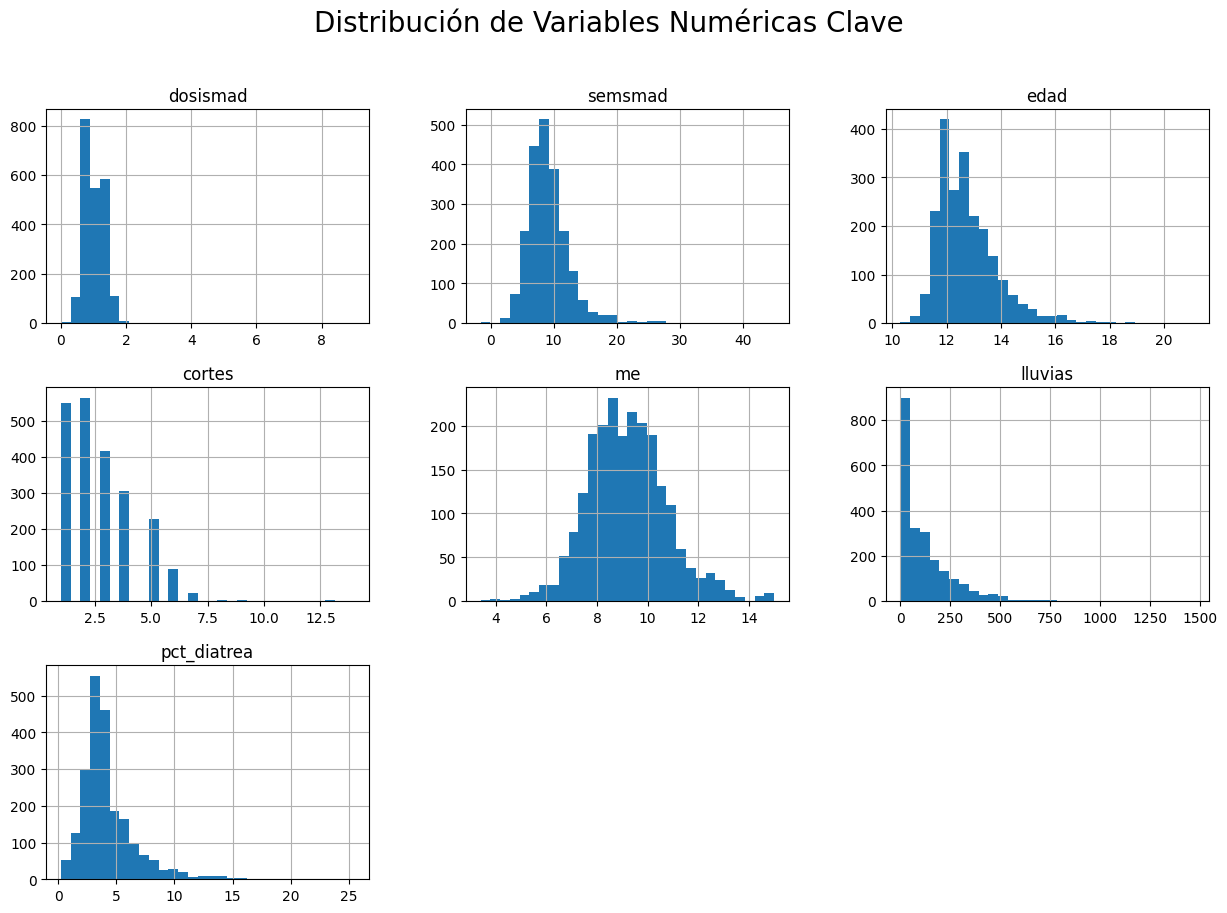

In [59]:
# Distribución de algunas variables numéricas clave
var_numericas = ['dosismad', 'semsmad', 'edad', 'cortes', 'me', 'lluvias', 'pct_diatrea']
df[var_numericas].hist(bins=30, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distribución de Variables Numéricas Clave', fontsize=20)
plt.show()

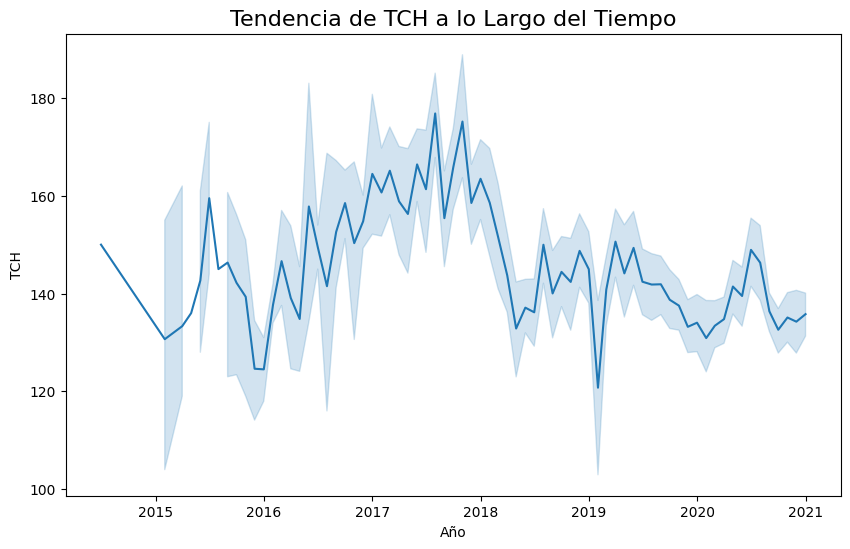

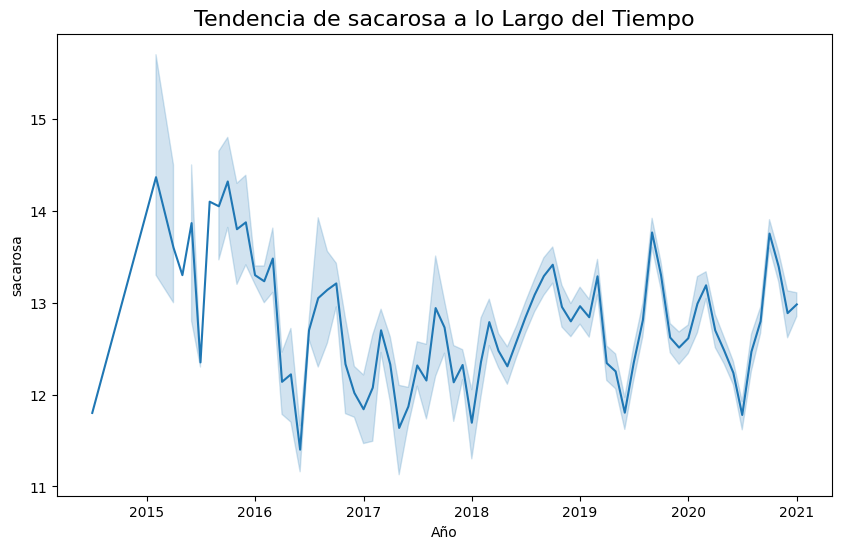

In [60]:
#Convertir mes y periodo a tipo datetime
df["periodo"] = pd.to_datetime(df["periodo"].astype(str), format="%Y%m")

# Crear un gráfico de líneas para la tendencia de TCH a lo largo del tiempo
plt.figure(figsize=(10, 6))
sns.lineplot(x='periodo', y='TCH', data=df)

plt.title('Tendencia de TCH a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Año')
plt.ylabel('TCH')
plt.show()

# Crear un gráfico de líneas para la tendencia de sacarosa a lo largo del tiempo
plt.figure(figsize=(10, 6))
sns.lineplot(x='periodo', y='sacarosa', data=df)

plt.title('Tendencia de sacarosa a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Año')
plt.ylabel('sacarosa')
plt.show()

### Definición de rangos para convertir las variables continuas 'TCH' y 'sacarosa' en categorías

##### Para definir los rangos de las variables 'TCH' y 'sacarosa' se eligió hacerlo por cuartiles ya que distribuye en 3 partes iguales los datos (33%, 33% y 33%) y da un buen balance en los datos de cada categoria: bajo, medio y alto

In [61]:
#Rangos para TCH
rangos_TCH = pd.qcut(df['TCH'], q=3)
rangos_TCH_ordenados = sorted(rangos_TCH.unique())

print("Rangos de los cuartiles")
print(rangos_TCH_ordenados)

print("\nConteo para cada rango")
print(rangos_TCH.value_counts().reindex(rangos_TCH_ordenados))

Rangos de los cuartiles
[Interval(5.999, 133.0, closed='right'), Interval(133.0, 153.0, closed='right'), Interval(153.0, 249.0, closed='right')]

Conteo para cada rango
TCH
(5.999, 133.0]    754
(133.0, 153.0]    705
(153.0, 249.0]    728
Name: count, dtype: int64


In [62]:
#Rangos para sacarosa
rangos_sacarosa = pd.qcut(df['sacarosa'], q=3)
rangos_sacarosa_ordenados = sorted(rangos_sacarosa.unique())

print("Rangos de los cuartiles")
print(rangos_sacarosa_ordenados)

print("\nConteo para cada rango")
print(rangos_sacarosa.value_counts().reindex(rangos_sacarosa_ordenados))

Rangos de los cuartiles
[Interval(9.199, 12.4, closed='right'), Interval(12.4, 13.1, closed='right'), Interval(13.1, 16.0, closed='right')]

Conteo para cada rango
sacarosa
(9.199, 12.4]    761
(12.4, 13.1]     710
(13.1, 16.0]     716
Name: count, dtype: int64


In [63]:
#Categorizacion de TCH y sacarosa
#Discretizacion con cuartiles
df['nivel_TCH'] = pd.qcut(df['TCH'], q=3, labels=['Alto', 'Medio', 'Bajo'])
print(df['nivel_TCH'].value_counts())

df['nivel_sacarosa'] = pd.qcut(df['sacarosa'], q=3, labels=['Alto', 'Medio', 'Bajo'])
print(df['nivel_sacarosa'].value_counts())

nivel_TCH
Alto     754
Bajo     728
Medio    705
Name: count, dtype: int64
nivel_sacarosa
Alto     761
Bajo     716
Medio    710
Name: count, dtype: int64


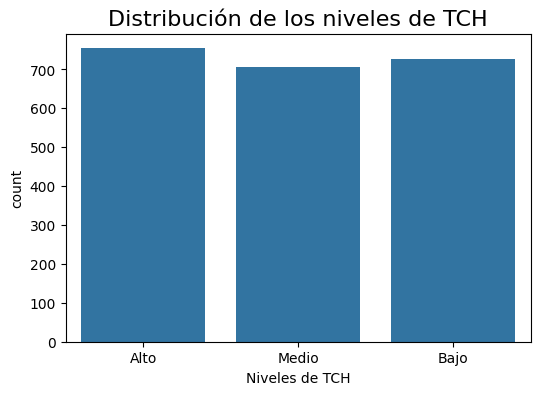

Niveles de TCH (Alto): 34.48%
Niveles de TCH (Medio): 32.24%
Niveles de TCH (Bajo): 33.29%


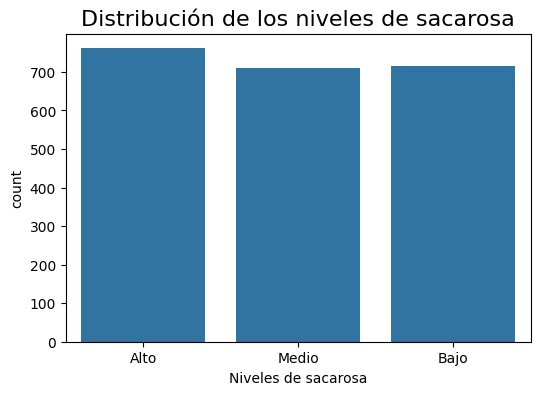

Niveles de sacarosa (Alto): 34.80%
Niveles de sacarosa (Medio): 32.46%
Niveles de sacarosa (Bajo): 32.74%


In [64]:
# Visualizamos la distribución de la variable objetivo 'nivel_TCH'
plt.figure(figsize=(6, 4))
sns.countplot(x='nivel_TCH', data=df)
plt.title('Distribución de los niveles de TCH', fontsize=16)
plt.xlabel('Niveles de TCH')
plt.show()

# Calculamos el porcentaje exacto
tch_counts = df['nivel_TCH'].value_counts(normalize=True) * 100
print(f"Niveles de TCH (Alto): {tch_counts['Alto']:.2f}%")
print(f"Niveles de TCH (Medio): {tch_counts['Medio']:.2f}%")
print(f"Niveles de TCH (Bajo): {tch_counts['Bajo']:.2f}%")

# Visualizamos la distribución de la variable objetivo 'nivel_sacarosa'
plt.figure(figsize=(6, 4))
sns.countplot(x='nivel_sacarosa', data=df)
plt.title('Distribución de los niveles de sacarosa', fontsize=16)
plt.xlabel('Niveles de sacarosa')
plt.show()

# Calculamos el porcentaje exacto
sacarosa_counts = df['nivel_sacarosa'].value_counts(normalize=True) * 100
print(f"Niveles de sacarosa (Alto): {sacarosa_counts['Alto']:.2f}%")
print(f"Niveles de sacarosa (Medio): {sacarosa_counts['Medio']:.2f}%")
print(f"Niveles de sacarosa (Bajo): {sacarosa_counts['Bajo']:.2f}%")

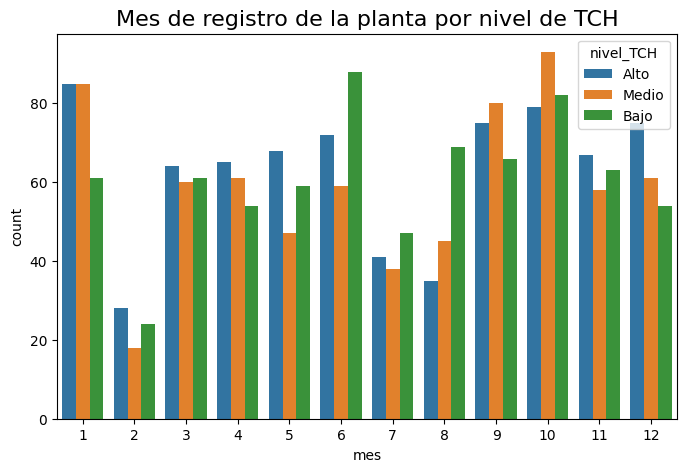

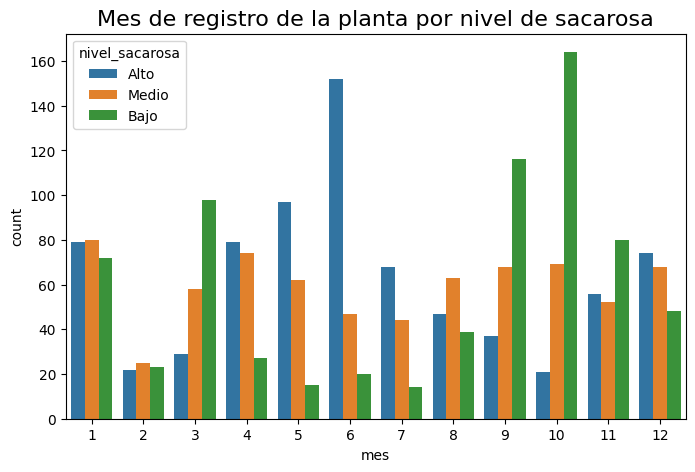

In [65]:
# Relación del mes por nivel de TCH
plt.figure(figsize=(8, 5))
sns.countplot(x='mes', hue='nivel_TCH', data=df)
plt.title('Mes de registro de la planta por nivel de TCH', fontsize=16)
plt.show()

# Relación de la edad por nivel de sacarosa
plt.figure(figsize=(8, 5))
sns.countplot(x='mes', hue='nivel_sacarosa', data=df)
plt.title('Mes de registro de la planta por nivel de sacarosa', fontsize=16)
plt.show()

#### Se ha decicido eliminar las siguientes variables ya que no aportaban valor a los modelos y generaban ruido ya que al transformarlas con OneHotEncoder aumentaban considerablemente la cantidad de variables generando la "maldición de la dimensionalidad", y tambien hubiera producido sobreajuste y aumento en la complejidad computacional

In [66]:
# Eliminar las columnas irrelevantes
columnas_a_eliminar = ['Unnamed: 0', 'NOME', 'FAZ', 'TAL', 'tipocorte', 'variedad', 'madurada', 'producto', 'grupo_tenencia','TCH', 'sacarosa']
df_ajustado = df.drop(columns=columnas_a_eliminar, axis=1)

In [67]:
df_ajustado.columns.tolist()

['dosismad',
 'semsmad',
 'edad',
 'cortes',
 'me',
 'vejez',
 'mes',
 'periodo',
 'lluvias',
 'pct_diatrea',
 'nivel_TCH',
 'nivel_sacarosa']

### Modelo de clasificación para nivel_TCH

In [68]:
# Definir características (X) y objetivo (y) para nivel_TCH
X = df_ajustado.drop(['nivel_TCH', 'periodo'], axis=1)
y = df_ajustado['nivel_TCH']

# Dividir los datos antes de cualquier preprocesamiento para evitar fuga de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

In [69]:
# Re-identificar columnas numéricas y categóricas del DataFrame completo
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='category').columns.tolist()

ordinal_features = ['nivel_sacarosa']
niveles_sacarosa = ['Bajo', 'Medio', 'Alto']

# Crear el ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('ord', OrdinalEncoder(categories=[niveles_sacarosa]), ['nivel_sacarosa'])
    ],
    remainder='passthrough'
)

pipeline_reg_logistica = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty=None, solver='lbfgs', random_state=42))
])

# Entrenar el modelo
pipeline_reg_logistica.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_simple = pipeline_reg_logistica.predict(X_test)

### Evaluación de metricas

--- Evaluación del Modelo Base ---
Accuracy: 0.4178


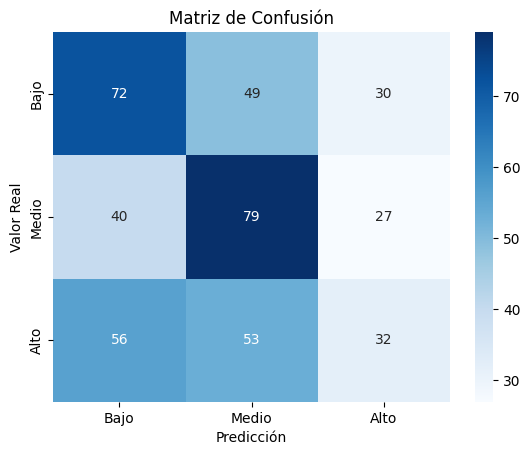


--- Reporte de Clasificación ---
              precision    recall  f1-score   support

        Bajo       0.43      0.48      0.45       151
       Medio       0.44      0.54      0.48       146
        Alto       0.36      0.23      0.28       141

    accuracy                           0.42       438
   macro avg       0.41      0.41      0.40       438
weighted avg       0.41      0.42      0.41       438



In [70]:
# Realizar predicciones
y_pred_base = pipeline_reg_logistica.predict(X_test)

# Calcular Accuracy
accuracy_base = accuracy_score(y_test, y_pred_base)
print(f"--- Evaluación del Modelo Base ---")
print(f"Accuracy: {accuracy_base:.4f}")
# Mostrar Matriz de Confusión
cm_base = confusion_matrix(y_test, y_pred_base)
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Blues', xticklabels=['Bajo', 'Medio', 'Alto'], yticklabels=['Bajo', 'Medio', 'Alto'])
plt.title('Matriz de Confusión')
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.show()

# Mostrar reporte de clasificación completo
print("\n--- Reporte de Clasificación ---")
print(classification_report(y_test, y_pred_base, target_names=['Bajo', 'Medio', 'Alto']))

### Modelo con regularización

In [71]:
# --- Modelo con Regularización L2 (Ridge) ---
pipeline_ridge = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', LogisticRegression(penalty='l2', solver='liblinear', random_state=42))])

# --- Modelo con Regularización L1 (Lasso) ---
pipeline_lasso = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', LogisticRegression(penalty='l1', solver='liblinear', random_state=42))])

# Definir el espacio de búsqueda del hiperparámetro C (inverso de lambda)
# Un valor pequeño de C significa una regularización más fuerte.
param_grid = {'classifier__C': np.logspace(-4, 4, 50)}

# Configurar GridSearchCV para encontrar el mejor modelo basado en F1-Score
grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

# Entrenar los modelos
# Entrenar los modelos
print("Entrenando modelo Ridge (L2)...")
grid_search_ridge.fit(X_train, y_train)
print("Entrenando modelo Lasso (L1)...")
grid_search_lasso.fit(X_train, y_train)

print("\n--- Resultados de GridSearchCV ---")
print(f"Mejor F1-Score para Ridge (L2): {grid_search_ridge.best_score_:.4f} con C={grid_search_ridge.best_params_['classifier__C']:.4f}")
print(f"Mejor F1-Score para Lasso (L1): {grid_search_lasso.best_score_:.4f} con C={grid_search_lasso.best_params_['classifier__C']:.4f}")


Entrenando modelo Ridge (L2)...


c:\Users\aleja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


Entrenando modelo Lasso (L1)...

--- Resultados de GridSearchCV ---
Mejor F1-Score para Ridge (L2): 0.4422 con C=0.0133
Mejor F1-Score para Lasso (L1): 0.4387 con C=2.5595


c:\Users\aleja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


### Selección de características

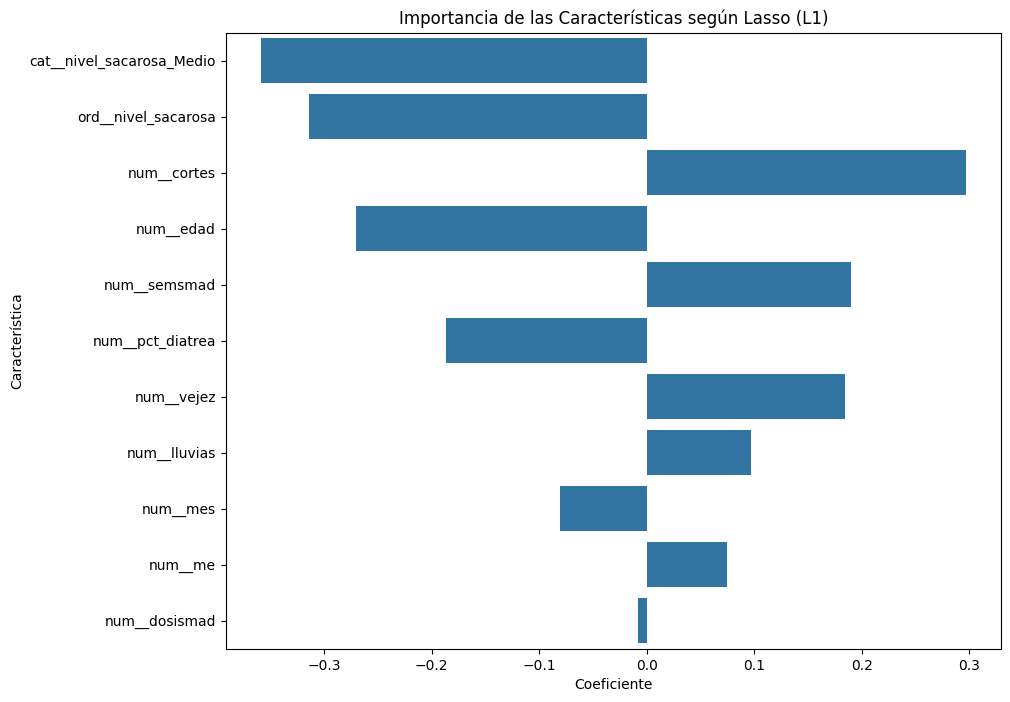

In [72]:
# Extraer los coeficientes del mejor modelo Lasso
best_lasso_model = grid_search_lasso.best_estimator_
lasso_coeffs = best_lasso_model.named_steps['classifier'].coef_[0]
feature_names = best_lasso_model.named_steps['preprocessor'].get_feature_names_out()

# Crear un DataFrame para visualizar la importancia

coeffs_df = pd.DataFrame({'Característica': feature_names, 'Coeficiente': lasso_coeffs})
significant_coeffs = coeffs_df[coeffs_df['Coeficiente'] != 0].sort_values('Coeficiente', key=abs, ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Coeficiente', y='Característica', data=significant_coeffs)
plt.title('Importancia de las Características según Lasso (L1)')
plt.show()

### Validación cruzada

In [73]:
# Usamos el mejor estimador encontrado por GridSearchCV
champion_model = grid_search_lasso.best_estimator_
# Realizamos una validación cruzada de 5 folds sobre los datos de entrenamiento
cv_scores_f1 = cross_val_score(champion_model, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1)
cv_scores_roc_auc = cross_val_score(champion_model, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)

print("\n--- Validación Cruzada Final del Modelo Campeón (Lasso) ---")
print(f"F1-Score promedio (CV): {np.mean(cv_scores_f1):.4f} (+/- {np.std(cv_scores_f1):.4f})")


--- Validación Cruzada Final del Modelo Campeón (Lasso) ---
F1-Score promedio (CV): 0.4387 (+/- 0.0259)


### Evaluación del modelo con el conjunto de prueba

In [74]:
# Realizar predicciones finales en el conjunto de prueba
y_pred_final = champion_model.predict(X_test)
y_pred_proba_final = champion_model.predict_proba(X_test)[:, 1]

print("\n--- Evaluación Final en el Conjunto de Prueba para nivel_TCH---")
print(classification_report(y_test, y_pred_final, target_names=['Bajo', 'Medio', 'Alto']))


--- Evaluación Final en el Conjunto de Prueba para nivel_TCH---
              precision    recall  f1-score   support

        Bajo       0.44      0.50      0.46       151
       Medio       0.45      0.56      0.50       146
        Alto       0.40      0.23      0.30       141

    accuracy                           0.43       438
   macro avg       0.43      0.43      0.42       438
weighted avg       0.43      0.43      0.42       438



### Modelo KNN con ajuste de hiperparámetros para nivel_TCH

In [75]:
# Pipeline para KNN
pipeline_knn = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier())])

# Definir el rango de K para probar
param_grid_knn = {'classifier__n_neighbors': np.arange(1, 31)}

# GridSearch para KNN
grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

print(f"\n--- KNN Classifier con GridSearchCV ---")
print(f"Mejor K (n_neighbors): {grid_search_knn.best_params_['classifier__n_neighbors']}")
print(f"Mejor F1-Score (CV): {grid_search_knn.best_score_:.4f}")

# Obtener el mejor modelo encontrado por GridSearchCV
best_knn_model = grid_search_knn.best_estimator_

# Hacer predicciones en el conjunto de prueba
y_pred_knn = best_knn_model.predict(X_test)

print("\n--- Evaluación Final en el Conjunto de Prueba para nivel_TCH ---")
print(classification_report(y_test, y_pred_knn, target_names=['Bajo', 'Medio', 'Alto']))


--- KNN Classifier con GridSearchCV ---
Mejor K (n_neighbors): 19
Mejor F1-Score (CV): 0.4496

--- Evaluación Final en el Conjunto de Prueba para nivel_TCH ---
              precision    recall  f1-score   support

        Bajo       0.42      0.40      0.41       151
       Medio       0.43      0.55      0.48       146
        Alto       0.35      0.26      0.30       141

    accuracy                           0.41       438
   macro avg       0.40      0.40      0.40       438
weighted avg       0.40      0.41      0.40       438



### Modelo de clasificación para nivel_sacarosa

In [76]:
# Definir características (X) y objetivo (y) para nivel_sacarosa
X = df_ajustado.drop(['nivel_sacarosa', 'periodo'], axis=1)
y = df_ajustado['nivel_sacarosa']

# Dividir los datos antes de cualquier preprocesamiento para evitar fuga de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

In [77]:
# Re-identificar columnas numéricas y categóricas del DataFrame completo
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='category').columns.tolist()

ordinal_features = ['nivel_TCH']
niveles_TCH = ['Bajo', 'Medio', 'Alto']

# Crear el ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('ord', OrdinalEncoder(categories=[niveles_TCH]), ['nivel_TCH'])
    ],
    remainder='passthrough'
)

pipeline_reg_logistica = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty=None, solver='lbfgs', random_state=42))
])

# Entrenar el modelo
pipeline_reg_logistica.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_simple = pipeline_reg_logistica.predict(X_test)

### Evaluación de metricas

--- Evaluación del Modelo Base ---
Accuracy: 0.4658


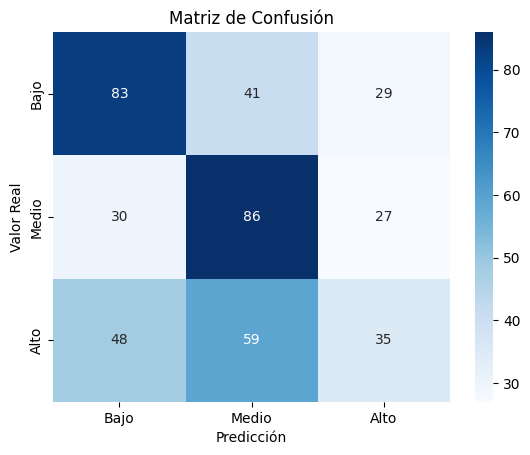


--- Reporte de Clasificación ---
              precision    recall  f1-score   support

        Bajo       0.52      0.54      0.53       153
       Medio       0.46      0.60      0.52       143
        Alto       0.38      0.25      0.30       142

    accuracy                           0.47       438
   macro avg       0.45      0.46      0.45       438
weighted avg       0.46      0.47      0.45       438



In [78]:
# Realizar predicciones
y_pred_base = pipeline_reg_logistica.predict(X_test)

# Calcular Accuracy
accuracy_base = accuracy_score(y_test, y_pred_base)
print(f"--- Evaluación del Modelo Base ---")
print(f"Accuracy: {accuracy_base:.4f}")
# Mostrar Matriz de Confusión
cm_base = confusion_matrix(y_test, y_pred_base)
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Blues', xticklabels=['Bajo', 'Medio', 'Alto'], yticklabels=['Bajo', 'Medio', 'Alto'])
plt.title('Matriz de Confusión')
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.show()

# Mostrar reporte de clasificación completo
print("\n--- Reporte de Clasificación ---")
print(classification_report(y_test, y_pred_base, target_names=['Bajo', 'Medio', 'Alto']))

### Modelo con Regularización

In [79]:
# --- Modelo con Regularización L2 (Ridge) ---
pipeline_ridge = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', LogisticRegression(penalty='l2', solver='liblinear', random_state=42))])

# --- Modelo con Regularización L1 (Lasso) ---
pipeline_lasso = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', LogisticRegression(penalty='l1', solver='liblinear', random_state=42))])

# Definir el espacio de búsqueda del hiperparámetro C (inverso de lambda)
# Un valor pequeño de C significa una regularización más fuerte.
param_grid = {'classifier__C': np.logspace(-4, 4, 50)}

# Configurar GridSearchCV para encontrar el mejor modelo basado en F1-Score
grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

# Entrenar los modelos
# Entrenar los modelos
print("Entrenando modelo Ridge (L2)...")
grid_search_ridge.fit(X_train, y_train)
print("Entrenando modelo Lasso (L1)...")
grid_search_lasso.fit(X_train, y_train)

print("\n--- Resultados de GridSearchCV ---")
print(f"Mejor F1-Score para Ridge (L2): {grid_search_ridge.best_score_:.4f} con C={grid_search_ridge.best_params_['classifier__C']:.4f}")
print(f"Mejor F1-Score para Lasso (L1): {grid_search_lasso.best_score_:.4f} con C={grid_search_lasso.best_params_['classifier__C']:.4f}")


Entrenando modelo Ridge (L2)...


c:\Users\aleja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


Entrenando modelo Lasso (L1)...

--- Resultados de GridSearchCV ---
Mejor F1-Score para Ridge (L2): 0.4504 con C=0.1265
Mejor F1-Score para Lasso (L1): 0.4492 con C=0.8286


c:\Users\aleja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


### Selección de características

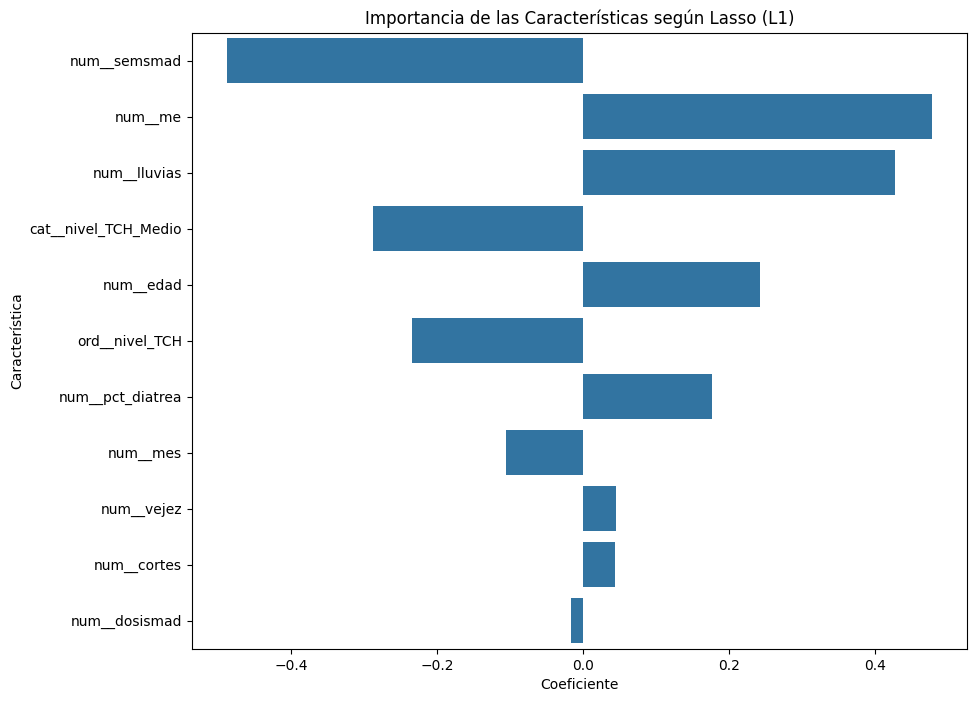

In [80]:
# Extraer los coeficientes del mejor modelo Lasso
best_lasso_model = grid_search_lasso.best_estimator_
lasso_coeffs = best_lasso_model.named_steps['classifier'].coef_[0]
feature_names = best_lasso_model.named_steps['preprocessor'].get_feature_names_out()

# Crear un DataFrame para visualizar la importancia

coeffs_df = pd.DataFrame({'Característica': feature_names, 'Coeficiente': lasso_coeffs})
significant_coeffs = coeffs_df[coeffs_df['Coeficiente'] != 0].sort_values('Coeficiente', key=abs, ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Coeficiente', y='Característica', data=significant_coeffs)
plt.title('Importancia de las Características según Lasso (L1)')
plt.show()

### Validación cruzada

In [81]:
# Usamos el mejor estimador encontrado por GridSearchCV
champion_model = grid_search_lasso.best_estimator_
# Realizamos una validación cruzada de 5 folds sobre los datos de entrenamiento
cv_scores_f1 = cross_val_score(champion_model, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1)
cv_scores_roc_auc = cross_val_score(champion_model, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)

print("\n--- Validación Cruzada Final del Modelo Campeón (Lasso) ---")
print(f"F1-Score promedio (CV): {np.mean(cv_scores_f1):.4f} (+/- {np.std(cv_scores_f1):.4f})")


--- Validación Cruzada Final del Modelo Campeón (Lasso) ---
F1-Score promedio (CV): 0.4492 (+/- 0.0246)


### Evaluación del modelo con el conjunto de prueba

In [82]:
# Realizar predicciones finales en el conjunto de prueba
y_pred_final = champion_model.predict(X_test)
y_pred_proba_final = champion_model.predict_proba(X_test)[:, 1]

print("\n--- Evaluación Final en el Conjunto de Prueba para nivel_sacarosa ---")
print(classification_report(y_test, y_pred_final, target_names=['Bajo', 'Medio', 'Alto']))


--- Evaluación Final en el Conjunto de Prueba para nivel_sacarosa ---
              precision    recall  f1-score   support

        Bajo       0.52      0.58      0.55       153
       Medio       0.47      0.64      0.54       143
        Alto       0.42      0.20      0.27       142

    accuracy                           0.48       438
   macro avg       0.47      0.48      0.45       438
weighted avg       0.47      0.48      0.46       438



#### Después de realizar el modelo de clasificación el f1-score es de aproximadamente 0.5. Al utilizar regularización con Lasso y Ridge mejora un poco el modelo y con validación cruzada realmente no hay cambio.

### Modelo KNN con ajuste de hiperparámetros para nivel_sacarosa

In [83]:
# Pipeline para KNN
pipeline_knn = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier())])

# Definir el rango de K para probar
param_grid_knn = {'classifier__n_neighbors': np.arange(1, 31)}

# GridSearch para KNN
grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

print(f"\n--- KNN Classifier con GridSearchCV ---")
print(f"Mejor K (n_neighbors): {grid_search_knn.best_params_['classifier__n_neighbors']}")
print(f"Mejor F1-Score (CV): {grid_search_knn.best_score_:.4f}")

# Obtener el mejor modelo encontrado por GridSearchCV
best_knn_model = grid_search_knn.best_estimator_

# Hacer predicciones en el conjunto de prueba
y_pred_knn = best_knn_model.predict(X_test)

print("\n--- Evaluación Final en el Conjunto de Prueba para nivel_sacarosa ---")
print(classification_report(y_test, y_pred_knn, target_names=['Bajo', 'Medio', 'Alto']))


--- KNN Classifier con GridSearchCV ---
Mejor K (n_neighbors): 12
Mejor F1-Score (CV): 0.4815

--- Evaluación Final en el Conjunto de Prueba para nivel_sacarosa ---
              precision    recall  f1-score   support

        Bajo       0.53      0.54      0.53       153
       Medio       0.52      0.64      0.57       143
        Alto       0.37      0.27      0.31       142

    accuracy                           0.49       438
   macro avg       0.47      0.48      0.47       438
weighted avg       0.47      0.49      0.48       438



#### Al realizar los modelos de regresión logística y KNN para las dos variables objetivos (nivel_TCH y nivel_sacarosa) el f1-score es de aproximadamente 0.5. Luego se implementó regularización con Lasso y Ridge mejorando un poco el modelo, después se decidió hacer validación cruzada con Lasso ya que ayuda a hacer selección de características y su resultado indica que realmente no hay un cambio significativo. El recall para la categoría alto es aproximadamente de 0.2 siendo muy bajo, y para las categorías bajo y medio de 0.5. Esto nos está indicando que el modelo solo puede identificar la mitad de los datos y para la categoria alto en el cual se podria enfocar el ingenio el resultado no es favorable.

#### La matriz de correlación que se realizó en el EDA ya estaba indicando correlaciones bajas entre las variables predictoras y objetivo, pero se necesitaba hacer modelos de clasificación y KNN para confirmarlo. Los resultados obtenidos en los modelos muestran que el poder predictivo es muy bajo y se requieren mas variables predictoras que tengan correlaciones fuertes con las variables objetivo a través de ingeniería de características.